# Assignment 1



- Set Jupyter running in your home account so that you can use it remotely (Optional due to Covid-19!)
- Build **2 layer** network for Handwritten Digit Classification using pure python/numpy  (without the layers from PyTorch)
    - Input data **x** : 20 x 784 (20 is the batch size, 784 = 28 x 28))
    - Hidden size 64
    - label **y** : 20 x 10
    - Weight Variable **W** with random initialization (e.g., Uniform[-0.5,0.5])
    - Bias variable **b** with zeros (no bias)
    - Sigmoid nonlinearity
    - Use softmax activation => (**W** . **x** + **b**)
    - Use OneHot encoding and MSE loss! Not the best way for classification but just for practice 
    - Train the model on MNIST through gradient descent
    - PS: If you dont know how to start see this:
     - http://iamtrask.github.io/2015/07/12/basic-python-network/
     - http://neuralnetworksanddeeplearning.com/chap1.html
     - https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e
     - https://aimatters.wordpress.com/2019/06/17/the-softmax-function-derivative/
- Submit your Jupyter Notebook (.ipynb) and an HTML export to villar@ais.uni-bonn.de with subject: **CudaLab: Assignment1**

# THE MNIST DATABASE

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [ ]:
train_dataset= dsets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
test_dataset= dsets.MNIST(root='./data',train=False,transform=transforms.ToTensor(),download=True)

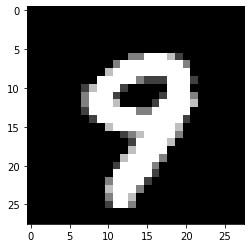

In [ ]:
img = train_dataset[5999][0].numpy().reshape(28,28)
plt.imshow(img,cmap='gray')

In [ ]:
class neural_network(object):
  '''Two layer neural network, with softmax activation function'''

  def sigmoid(self, z):
    return (1/(1+np.exp(-z)))

  def prime_sigmoid(self, z):
    return (self.sigmoid(z)*(1-self.sigmoid(z)))

  def softmax(self, z):
    return (np.exp(z)/np.sum(np.exp(z), axis=0))

  def MSE(self, y, y_hat):
    self.loss = (np.square(y - y_hat)).mean()
    return self.loss

  def Forward_pass(self, X, parameters):

    self.forward_pass = {}
    self.forward_pass["Z1"] = np.matmul(parameters["W1"], X) + parameters["b1"]
    self.forward_pass["A1"] = self.sigmoid(self.forward_pass["Z1"])
    self.forward_pass["Z2"] = np.matmul(parameters["W2"], self.forward_pass["A1"]) + parameters["b2"]
    self.forward_pass["A2"] = self.softmax(self.forward_pass["Z2"])

    return self.forward_pass

  def Backward_pass(self, X, Y, parameters, fp, bs):

    self.gradients = {}

    self.dZ2 = fp["A2"] - Y
    self.dW2 = (1/bs)*(np.matmul(self.dZ2, fp["A1"].T))
    self.dB2 = (1/bs)*(np.sum(self.dZ2))

    self.dA1 = np.matmul(parameters["W2"].T, self.dZ2)
    self.dZ1 = self.dA1 * self.prime_sigmoid(fp["Z1"])
    self.dW1 = (1/bs)*(np.matmul(self.dZ1, X.T))
    self.dB1 = (1/bs)*(np.sum(self.dZ1))

    self.gradients["dW1"] = self.dW1
    self.gradients["dB1"] = self.dB1
    self.gradients["dW2"] = self.dW2
    self.gradients["dB2"] = self.dB2

    return self.gradients  

In [ ]:
def one_hot_encoding(n, labels):
  '''One hot encoding function for target labels'''

  number_of_examples = labels.shape[0]
  labels = labels.reshape(1, number_of_examples)
  labels = np.eye(n)[labels.astype('int32')]
  labels = labels.reshape(number_of_examples, n)

  return labels

In [ ]:
Number_of_training_samples = 60000
Number_of_testing_samples = 10000
number_of_digits = 10

In [ ]:
#dataset loader for accessing as numpy arrays
train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=Number_of_training_samples, shuffle=True)
test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=Number_of_testing_samples, shuffle=True)
#iterating over loader for obtaining the images and their labels
train_images, train_labels = next(iter(train_data_loader))
test_images, test_labels = next(iter(test_data_loader))
print(train_images.shape)
print(train_labels.shape)
#Flattening the images
train_images = train_images.reshape(Number_of_training_samples, 28*28).numpy()
train_labels = train_labels.numpy()
test_images = test_images.reshape(Number_of_testing_samples, 28*28).numpy()
test_labels = test_labels.numpy()

#One hot encoding for the target labels
train_labels = one_hot_encoding(number_of_digits, train_labels) 
test_labels = one_hot_encoding(number_of_digits, test_labels)
print(train_labels.shape)
print(test_labels.shape)


#shuffeling the input data for better learning
np.random.seed(138)

shuffle_index = np.random.permutation(Number_of_training_samples)
train_images = train_images[shuffle_index,:].T
train_labels = train_labels[shuffle_index,:].T
test_images = test_images.T
test_labels = test_labels.T

torch.Size([60000, 1, 28, 28])
torch.Size([60000])
(60000, 10)
(10000, 10)


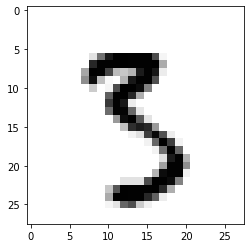

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [ ]:
#Example visualization
i = 17
plt.imshow(train_images[:,i].reshape(28,28), cmap=matplotlib.cm.binary)
plt.axis("on")
plt.show()
train_labels[:,i]

In [ ]:
class train_pred_nw(object):

    def __init__(self,
                 No_of_training_samples,
                 input_neurons,
                 hidden_neurons=64,
                 learning_rate=0.01,
                 batch_size=20,
                 epochs=100,
                 output_count=10):

        self.input_neurons = input_neurons
        self.hidden_neurons = hidden_neurons
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.epochs = epochs
        self.training_loss = 0
        self.validation_loss = 0
        self.No_of_training_samples = No_of_training_samples
        self.epoch_list = list()
        self.training_loss_list = list()
        self.validation_loss_list = list()
        self.number_of_batches = self.No_of_training_samples // self.batch_size
        self.output_count = output_count

        self.W1 = np.random.randn(self.hidden_neurons, self.input_neurons) * np.sqrt(1/self.input_neurons)
        self.b1 = np.zeros((self.hidden_neurons, 1)) * np.sqrt(1/self.input_neurons)
        self.W2 = np.random.randn(self.output_count, self.hidden_neurons) * np.sqrt(1/hidden_neurons)
        self.b2 = np.zeros((self.output_count, 1)) * np.sqrt(1/self.hidden_neurons)

        self.parameters = {"W1":self.W1, "b1":self.b1, "W2":self.W2, "b2":self.b2}

        # self.network = neural_network()

    def train(self, train_image, train_label, test_image, test_label):

        for i in range(self.epochs):
            shuffle = np.random.permutation(train_image.shape[1])
            train_images_shuffle = train_image[:, shuffle]
            train_labels_shuffle = train_label[:, shuffle]

            for j in range(self.number_of_batches):
                start = j * self.batch_size
                end = min(start+self.batch_size, train_image.shape[1]-1)

                X = train_images_shuffle[:, start:end]
                Y = train_labels_shuffle[:, start:end]

                size_of_batch = end - start

                forward_pass = neural_network().Forward_pass(X, self.parameters)
                backword_pass = neural_network().Backward_pass(X, Y, self.parameters, forward_pass, size_of_batch)

                self.parameters["W1"] = self.parameters["W1"] - self.learning_rate * backword_pass["dW1"]
                self.parameters["b1"] = self.parameters["b1"] - self.learning_rate * backword_pass["dB1"]
                self.parameters["W2"] = self.parameters["W2"] - self.learning_rate * backword_pass["dW2"]
                self.parameters["b2"] = self.parameters["b2"] - self.learning_rate * backword_pass["dB2"]

            forward_pass = neural_network().Forward_pass(train_image, self.parameters)
            self.training_loss = neural_network().MSE(train_label, forward_pass["A2"])
            val = neural_network().Forward_pass(test_image, self.parameters)
            self.validation_loss = neural_network().MSE(test_label, val["A2"])

            if (i%10 == 0):
                print("Epoch {}: training_loss = {}, testing_loss = {}".format(i+1 ,self.training_loss, self.validation_loss))

            self.epoch_list.append(i)
            self.training_loss_list.append(self.training_loss)
            self.validation_loss_list.append(self.validation_loss)

        return self.epoch_list, self.training_loss_list, self.validation_loss_list, self.parameters

    def prediction(self, test_image, test_label, params):

        feed_forward = neural_network().Forward_pass(test_image, params)
        predictions = np.argmax(feed_forward["A2"], axis=0)
        labels = np.argmax(test_label, axis=0)

        return predictions, labels

In [ ]:
model = train_pred_nw(Number_of_training_samples,
                      train_images.shape[0],
                      hidden_neurons=64,
                      learning_rate=0.01,
                      batch_size=20,
                      epochs=100,
                      output_count=10)

epoch_list, training_loss_list, testing_loss_list, params = model.train(train_images,
                                                                        train_labels,
                                                                        test_images,
                                                                        test_labels)

predictions, labels = model.prediction(test_images,
                                       test_labels,
                                       params)

Epoch 1: training_loss = 0.03587983567593385, testing_loss = 0.034970258989501575
Epoch 11: training_loss = 0.012116733812036993, testing_loss = 0.011713102690635765
Epoch 21: training_loss = 0.009527571626044869, testing_loss = 0.009482954492851008
Epoch 31: training_loss = 0.007908112124727262, testing_loss = 0.008065721686434713
Epoch 41: training_loss = 0.006819746778451289, testing_loss = 0.00712661211473627
Epoch 51: training_loss = 0.006008683104812181, testing_loss = 0.006440465343721129
Epoch 61: training_loss = 0.005388400487786659, testing_loss = 0.005932525234846036
Epoch 71: training_loss = 0.004869847021921613, testing_loss = 0.005525971797753041
Epoch 81: training_loss = 0.0044766401856089445, testing_loss = 0.00521812686596702
Epoch 91: training_loss = 0.004114485611974495, testing_loss = 0.00498683152905659


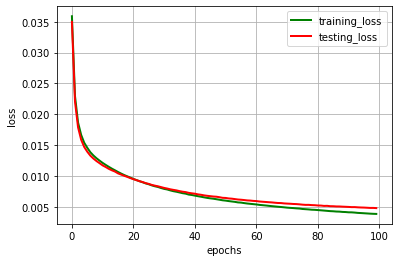

In [ ]:
plt.plot(epoch_list, training_loss_list,color='green',linewidth=2, markersize=12, label='training_loss')
plt.plot(epoch_list, testing_loss_list,color='red',linewidth=2, markersize=12, label='testing_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.legend()
plt.show()

In [ ]:
print("Confusion matrix:")
print(confusion_matrix(predictions, labels))
print("Performance analysis:")
print(classification_report(predictions, labels))

Confusion matrix:
[[ 968    0    6    0    1    5    9    2    5    7]
 [   0 1119    2    0    0    1    3    7    1    5]
 [   1    3 1004    9    7    1    1   13    3    1]
 [   2    1    3  976    0   12    1    4    5   11]
 [   0    0    3    0  950    2    3    3    4   20]
 [   3    1    0    8    0  855    6    1    6    2]
 [   4    4    3    0    3    8  929    0    6    0]
 [   1    2    6    8    2    1    0  986    5   10]
 [   1    5    5    7    3    4    6    2  938    2]
 [   0    0    0    2   16    3    0   10    1  951]]
Performance analysis:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1003
           1       0.99      0.98      0.98      1138
           2       0.97      0.96      0.97      1043
           3       0.97      0.96      0.96      1015
           4       0.97      0.96      0.97       985
           5       0.96      0.97      0.96       882
           6       0.97      0.97      0.97       

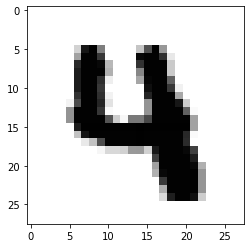

ground truth label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
predictions: 4
predicted labels: 4


In [ ]:
i = 5401
plt.imshow(test_images[:,i].reshape(28,28), cmap=matplotlib.cm.binary)
plt.axis("on")
plt.show()

print(f"ground truth label: {test_labels[:,i]}")
print(f"predictions: {predictions[i]}")
print(f"predicted labels: {labels[i]}")